# Predicting Heart Disease Using Machine Learning
 * Problem definition
 * Data
 * Evalution
 * Features
 * Modelling 
 * Experimentation
## Problem Definition

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import kneighbors_graph,KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix,classification_report,plot_roc_curve


In [2]:
df=pd.read_csv("13.1 heart-disease.csv")
df.shape

(303, 14)

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot: >

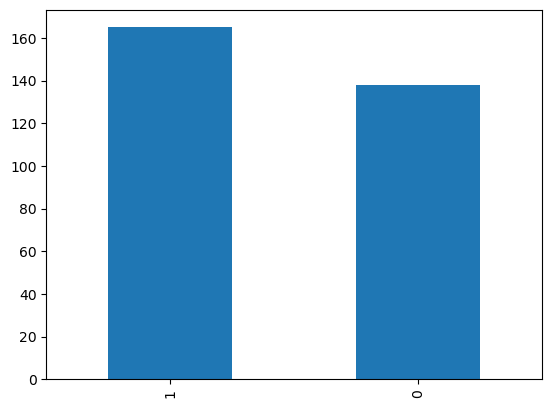

In [6]:
df["target"].value_counts().plot(kind="bar")

In [7]:
(df.loc[:].age==37).value_counts()

False    301
True       2
Name: age, dtype: int64

In [8]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


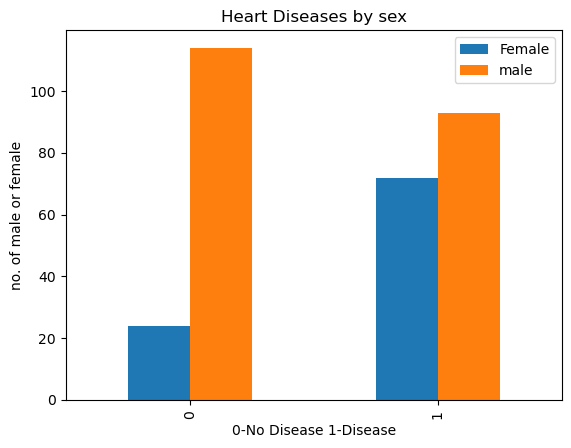

In [9]:
pd.crosstab(df.target,df.sex).plot(kind="bar")
plt.title("Heart Diseases by sex")
plt.xlabel("0-No Disease 1-Disease")
plt.ylabel("no. of male or female")
plt.legend(["Female","male"])

Text(0.5, 1.0, 'Heart Disease in func of thalach and age')

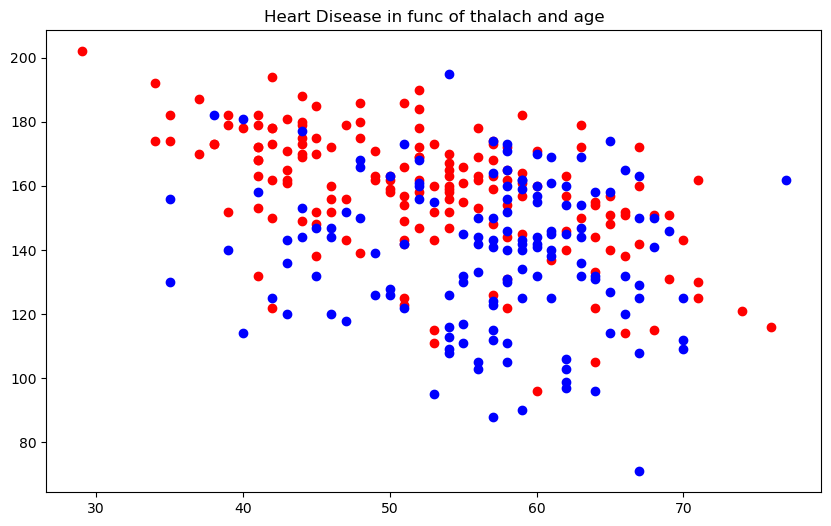

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],color="red")
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color="blue")
plt.title("Heart Disease in func of thalach and age")

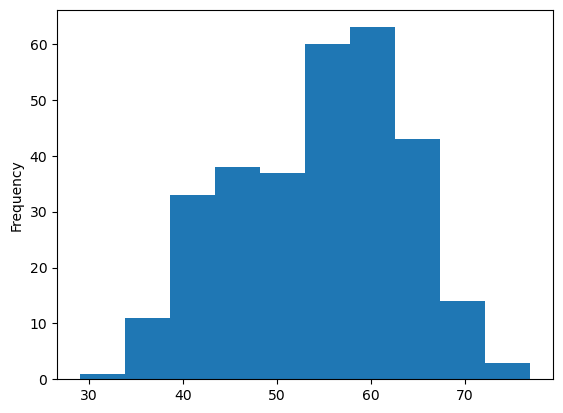

In [11]:
df.age.plot.hist();

In [12]:
# Chest pain type
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


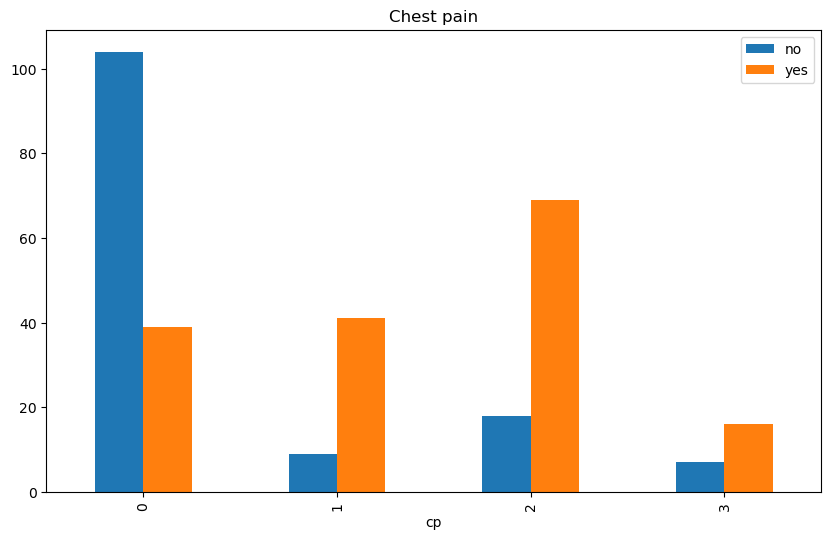

In [13]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6))
plt.title("Chest pain")
plt.legend(["no","yes"])

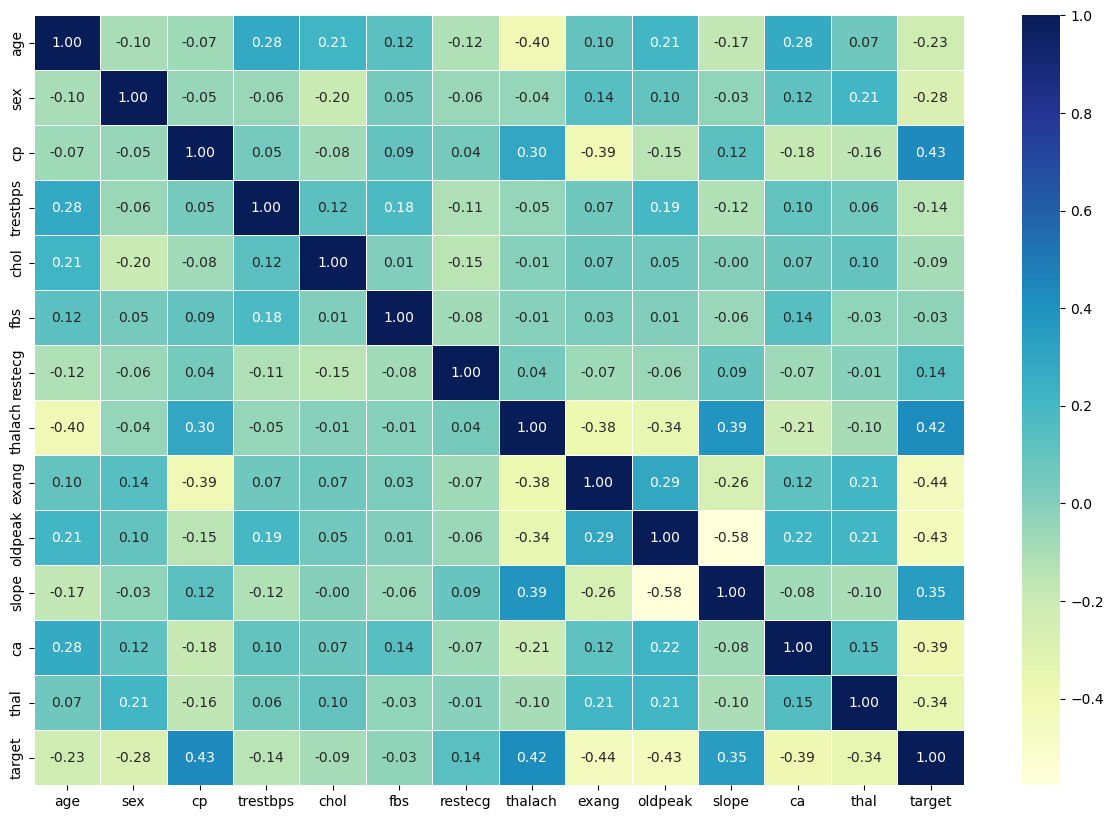

In [82]:
# corm=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corm,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")

## modelling 

In [17]:
x= df.drop("target",axis=1)
y= df["target"]

In [19]:
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

Try diff models
1. logistic 
2. k-nearest neighbours
3. rand forest

In [26]:
models={"logistic":LogisticRegression(),
       "K-nearest":KNeighborsClassifier(),
       "randforest":RandomForestClassifier()}
np.random.seed(42)

def fitandeval(x_tr,x_te,y_tr,y_te):
    model_scores={}
    for naam,model in models.items():
        model.fit(x_tr,y_tr)
        model_scores[naam]=model.score(x_te,y_te)
    return model_scores

In [28]:
ms=fitandeval(x_train,x_test,y_train,y_test)
ms

/home/kali/Desktop/ZTM/sample project/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logistic': 0.8852459016393442,
 'K-nearest': 0.6885245901639344,
 'randforest': 0.8524590163934426}

In [33]:
modf=pd.DataFrame(ms,index=["accuracy"])
modf

,logistic,K-nearest,randforest
accuracy,0.885246,0.688525,0.852459


<AxesSubplot: >

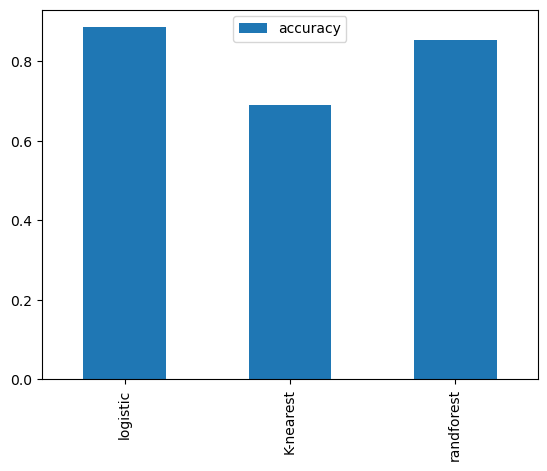

In [36]:
modf.T.plot.bar()

Lets look at following :
* hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross validation 
* f1 score 
* recall 
* accuracy
* precision
* classification report 
* roc curve 
* Area under curve (AUC)

In [39]:
# Hyperparam Tuning 
test_sscores=[]
neighbors=range(1,21)
cls=KNeighborsClassifier()
for i in neighbors:
    cls.set_params(n_neighbors=i)
    cls.fit(x_train,y_train)
    test_sscores.append(cls.score(x_test,y_test))
test_sscores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

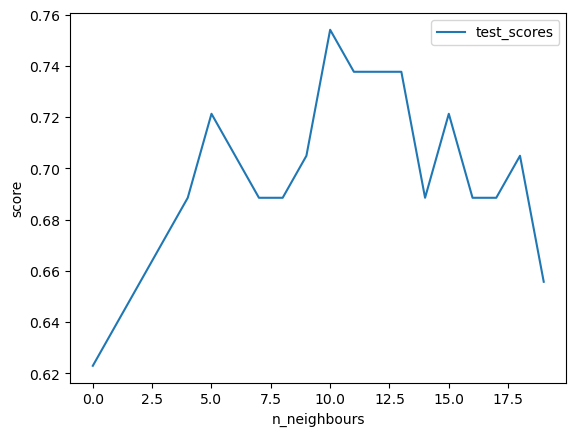

In [44]:
plt.plot(test_sscores,label="test_scores")
plt.xlabel("n_neighbours")
plt.ylabel("score")
plt.legend()

In [60]:
#Tuning with Randoomisedsearchcv
lrm=LogisticRegression()
log_grid={"C":np.logspace(-4,4,20),
          "solver":["liblinear"]}
rfc=RandomForestClassifier()
randf_grid={"n_estimators":np.arange(10,1000,50),
            "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

In [61]:
np.random.seed(42)
logiscv=RandomizedSearchCV(lrm,param_distributions=log_grid,cv=5,verbose=True,n_iter=22)
logiscv.fit(x_train,y_train)

/home/kali/Desktop/ZTM/sample project/env/lib/python3.10/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 20 is smaller than n_iter=22. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=22,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [53]:
logiscv.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [54]:
logiscv.score(x_test,y_test)

0.8852459016393442

In [67]:
np.random.seed(42)
rscv=RandomizedSearchCV(rfc,param_distributions=randf_grid,verbose=True,cv=5,n_iter=20)
rscv.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [68]:
rscv.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [69]:
rscv.score(x_test,y_test)

0.8688524590163934

## Use grid searchcv instead of randomsearchcv

In [71]:
logis_grids={"C":np.logspace(-4,4,30),
             "solver":["liblinear"]}
logisgcv=GridSearchCV(LogisticRegression(),param_grid=logis_grids,cv=5,verbose=True)


In [72]:
np.random.seed(42)
logisgcv.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [73]:
logisgcv.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [74]:
logisgcv.score(x_test,y_test)

0.8852459016393442

In [75]:
y_prds=logisgcv.predict(x_test)

/home/kali/Desktop/ZTM/sample project/env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


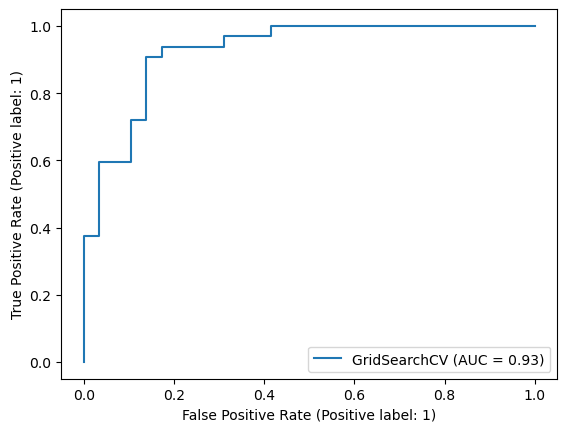

In [76]:
from sklearn.metrics import roc_curve,auc
plot_roc_curve(logisgcv,x_test,y_test)

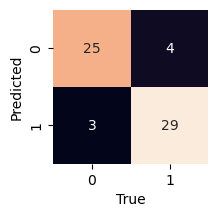

In [92]:

def plotconfusion(y_t,y_p):
    v=pd.DataFrame(confusion_matrix(y_t,y_p))
    fig,ax=plt.subplots(figsize=(2,2))
    ax=sns.heatmap(v,annot=True,cbar=False)
    plt.xlabel("True")
    plt.ylabel("Predicted")
plotconfusion(y_test,y_prds)

In [93]:
recall_score(y_test,y_prds)

0.90625

In [94]:
f1_score(y_test,y_prds)

0.8923076923076922

In [95]:
precision_score(y_test,y_prds)

0.8787878787878788

In [97]:
print(classification_report(y_test,y_prds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

